#!pip install GetOldTweets3
#!pip install nltk

import nltk

#nltk.download('punkt')

#nltk.download('stopwords')

#nltk.download('wordnet')

# Twitter Sentiment Analysis

### Abstract

The goal of this project was to predict sentiment for the given Twitter post using Python. Sentiment analysis can predict many different emotions attached to the text, we will predict sentiment according to our list of emotions with contain different emotions. We will use Corona Virus as our search key and will see the sentiments of the people after outbreak of corona virus.

### Used Python Libraries

In [58]:
import string
from collections import Counter
import matplotlib.pyplot as plt
import GetOldTweets3 as got

In [59]:
def get_tweets():
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#CoronaVirus') \
        .setLang('english') \
        .setSince('2020-04-01') \
        .setUntil('2020-04-10') \
        .setMaxTweets(1000)
    
    #Creating of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    
    #Creating list of chosen tweet data
    tweets = [[tweet.text] for tweet in tweets]
    return tweets

In [60]:
# reading text file
text = ""
text_tweets = get_tweets()

In [61]:
text_tweets

[["#America hopes to cover-up the real #coronavirus numbers by reducing the amount of testing. LMAO! The #pandemic doesn't go away by ignoring it. They didn't test in January, now suffering the consequences. Morons just don't learn."],
 ["#Kayseri'de apartmanın asansör kapısıyla merdiven korkuluklarına sıvı süren şüpheli kadın gözaltına alındı. #CoronaVirus "],
 ['Lanzo la pregunta: Al no mantenerse aislado pese a tener #coronavirus ¿El alcalde de #SanMartíndePorres estaría cometiendo un delito? ¿Puede la @FiscaliaPeru actuar de oficio? #COVID2019 #COVID2019'],
 ['There are 1,020 cases of confirmed coronavirus in and near Sachem, up from 804 cases two days ago. Here are the neighborhood-by-neighborhood numbers for Sachem and across Suffolk County. #StayHome #FlattenTheCurve #coronavirus #covid19'],
 ['Ponemos a disposición el INFORME DE SITUACIÓN en relación al #coronavirus COVID-19 en Uruguay correspondiente al 9/4. 17 nuevos casos positivos (473 en total): (HILO) https://twitter.com/

In [62]:
#Get the length of tweets that we fetched

length = len(text_tweets)
print(length)

1000


Ok so now we have 500 scrapped tweets from twitter on Corona Virus, now we will convert our list of tweets into plain text. 
To do so, we will loop all of our tweets with for lop

In [63]:
plain_text = ''
for i in range(0, length):
    plain_text = text_tweets[i][0] + " " + plain_text

We have converted our list into plain text. Now, we will procced towards data cleaning.

First, we will convert our all text into lower case as it is the best practice to implement as working with text.

In [64]:
#Converting to lowercase

lower_case  = plain_text.lower()

Here we have converted our text in to lowercase. Now, we will remove all special symbols i.e. punctuation from our text.

In [65]:
#removing punctuation

cleaned_text = lower_case.translate(str.maketrans('','',string.punctuation))

Here we have removed all punctuation from our text

Now, we will use word tokenize to seperate our words from sentence

In [66]:
# Using word_tokenize to tokenize sentence into words

from nltk.tokenize import word_tokenize

tokenized_words = word_tokenize(cleaned_text, "english")

Here we have converted our sentence into words. 
Now we will remove stopwords from our data

In [67]:
#Here we are removing stopwords from data

from nltk.corpus import stopwords

final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)


Now, we will use lemmatizer to transform our word from plural to single form 

In [68]:
# Lemmatization - From plural to single + Base form of a word (example better-> good)
from nltk.stem import WordNetLemmatizer

lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

Here we have converted our words to singluar form or to a base word using lemmatizer

Now, we will import our emotion list and will check each of our word with emotion list. Will see is any of our words matches with the emotion list words, if our words will exist in list the we will fetch emotion attached to that letter.

In [73]:
emotion_list = []

with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in lemma_words:
            emotion_list.append(emotion)
            


w = Counter(emotion_list)
print("Count of each emotion \n", w)

Count of each emotion 
 Counter({' sad': 5, ' powerless': 4, ' happy': 4, ' attracted': 3, ' surprise': 3, ' fearful': 3, ' alone': 3, ' angry': 2, ' free': 2, ' esteemed': 2, ' bored': 1, ' average': 1, ' demoralized': 1, ' belittled': 1, ' entitled': 1, ' lost': 1, ' attached': 1, ' adequate': 1, ' fearless': 1, ' independent': 1, ' anxious': 1, ' cheated': 1, ' loved': 1, ' hated': 1})


As we have fetched our sentiments from emotion list with there count, now we will plot it in a graph to see the sentiment count.

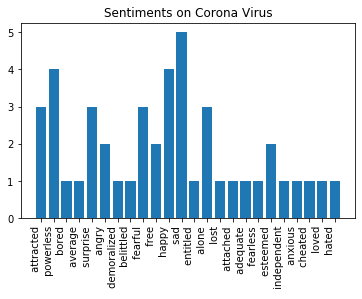

In [91]:
fig, ax1 = plt.subplots()
ax1.set_title('Sentiments on Corona Virus')
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate(rotation=90)
plt.savefig('graph.png')
plt.show()

Here we can see people sentiments after corona virus outbreak, most of the  sentiments are related with sadness, powerless, fearful etc.

In this project, we have seen sentiments of people by getting tweets of 10 days after major outbreak of corona virus. Here we have used GetOldTweets3 to fetch tweets from twitter. Also we have used tokenizer, stopwords and punctuation for our data preprocessing techniques. At the end we have used our emotion list to get sentiments from tweets.